![Codenation](https://forum.codenation.com.br/uploads/default/original/2X/2/2d2d2a9469f0171e7df2c4ee97f70c555e431e76.png)

__Autor__: Kazuki Yokoyama (kazuki.yokoyama@ufrgs.br)

# Distribuições de probabilidades

![normal](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/1200px-Normal_Distribution_PDF.svg.png)

Neste módulo falaremos sobre distribuições de probabilidade. A importância disso é fundamentar nossos conhecimentos para entendermos bem os conceitos mais avançados de machine learning, que frequentemente requisitam alguma base em probabilidade e estatística.

Falaremos portanto de variáveis aleatórias, funções de probabilidade, distribuição binomial e normal e, por fim, de técnicas de amostragem. 

In [1]:
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
# Algumas configurações para o matplotlib.
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Variáveis aleatórias

Primeiro, vamos definir variável aleatório, que será nossa unidade mais básica de estudo enquanto falarmos de distribuições de probabilidade.

Uma variável aleatória $X$ é uma função (ou mapa) entre um espaço amostral e os números reais:

$$X(\omega): \Omega \rightarrow \mathbb{R}$$

A necessidade de estabelecer esse conceito é facilitar trabalhar com valores aleatórios e resultados de experimentos aleatórios. O espaço amostral original, $\Omega$, pode ser muito complexo para se trabalhar diretamente, e uma medida mais simples dos resultados dos experimentos nesse espaço muitas vezes é o suficiente. Essa medida resumo dos possíveis resultados dos experimentos é o que chamamos de variável aleatória (V.A).

> A notação na literatura é identificar a variável aleatória (a função) por uma letra maiúscula, por exemplo $X$, e um possível valor para ela (um número real) por uma letra minúscula, $x$.

Uma V.A é dita discreta se ela pode tomar valores contáveis $\{x_{1}, x_{2}, \dots\}$. E é dita contínua se ela pode tomar valores reais.

__Exemplo 1__ (Retirado o Casella e Berger):

Imaginem o cenário onde queremos fazer uma pesquisa de opinião com 50 pessoas. Se anotarmos 0 para respostas "Não" e 1 para "Sim", nosso espaço amostral - a combinação de todas as respostas - é $2^{50}$, um número muito grande. Deve haver portanto um jeito de sumarizar essa informação. E há.

Como queremos saber apenas, por exemplo, a quantidade de pessoas que responderam "Sim", podemos representar essa informaçao com apenas um único escalar. Podemos definir nossa variável aleatória, $X$, como $X = \text{número de respondentes `Sim`}$. Reparem que os possíveis valores para $X$ são $\{0, 1, 2, 3, \dots, 50\}$, que é bem menor que $2^{50}$.

## Função de distribuição acumulada (CDF)

Associada a cada V.A existe uma __função de distribuição acumulada__ (do inglês, _Cumulative Distribution Function_ - CDF) que é definida como:

$$\Phi(x) = F_{X}(x) = P(X \leq x)$$

ou seja, a $F_{X}(x)$ é a probabilidade de obtermos um valor menor ou igual a $x$ para determinada V.A $X$. A partir de agora o sobrescrito $X$ da CDF será omitido e a V.A relacionada será implícita pela variável da função.

Algumas propriedades que decorrem dessa definição são:

* $F(x)$ é sempre não decrescente: $x_{1} < x_{2} \rightarrow F(x_{1}) < F(x_{2})$.
* $F(x)$ tem domínio no suporte de $X$ e imagem em $[0, 1]$.

Se uma V.A $X$ tem distribuição de probabilidade dada pela CDF $F$, então escrevemos $X \sim F$.

## Função de probabilidade

Associada a CDF exist uma função de probabilidade, $P(X=x)$, que nos diz a probabilidade da variável aleatória $X$ tomar um determinado valor $x$. Para uma função ser considerada uma função de probabilidade válida, ela deve satisfazer:

1. Ela deve ser sempre um valor não negativo, para qualquer valor de $X$: $P(X) \geq 0$.
2. A soma de todas probabilidades, para todos valores possíveis de $X$, deve ser exatamente igual a 1: $P(\Omega) = 1$.
3. A probabilidade da união de todos eventos (disjuntos dois a dois) deve ser igual à soma das probabilidades desses eventos: $P(\cup_{i}A_{i}) = \sum_{i} P(A_{i})$, se $A_{1}, A_{2}, \dots$ forem disjuntos dois a dois.

Chamamos de suporte de $X$ o conjunto de todos possíveis valores que $X$ pode assumir.

Se a V.A é discreta, então $f(x) = P(X=x)$ é chamada de __função massa de probabilidade__.

$$F(x) = P(X \leq x) = \sum_{k \leq x} f(k) = \sum_{k \leq x} P(X = k)$$

Se a V.A é contínua, então $f(x)$ é chamada __função de densidade de probabilidade__ e vale a relação (se $f(x)$ é contínua, o que acontece na maioria dos casos)

$$P(X \leq x) = F(x) = \int_{-\infty}^x f(t) dt$$

logo

$$f(x) = \frac{d}{dx}F(x)$$

Note que, se $X$ é contínua, $P(X=x) = 0$ para qualquer valor de $x$ no suporte de $X$. Consequentemente se $X$ é contínua, $P(X \leq x) = P(X < x)$.

A função densidade de probabilidade de uma V.A contínua não nos dá uma probabilidade em si, mas sim uma função cuja integral é uma probabilidade. Como em Cálculo I, a integral de uma função pode ser interpretada geometricamente como a área embaixo da curva dessa função, para determinado intervalo. Aqui no nosso caso, essa área é $F(x)$, enquanto a função é $f(x)$.

Um importante teorema que decorre é o seguinte:

$$P(a \leq X \leq b) = F(b) - F(a) = \int_{a}^{b} f(t) dt$$

Com isso, temos o básico de funções de probabilidade para prosseguirmos o estudo de distribuições.

## Distribuição normal

A distribuição normal (ou Gaussiana) é uma das mais famosas e icônicas distribuições __contínuas__ da estatística. Sua fama não é à toa. A distribuição normal tem importância devido a, principalmente, três fatores:

1. Seu tratamento analítico é muito fácil e já foi bastante explorado.
2. Muitos fenômenos naturais são facilmente modelados como distribuições normais.
3. Vários resultados importantes da estatística são dados em função da distribuição normal.

A distribuição normal tem dois parâmetros, $\mu$ e $\sigma^{2}$, que são a média e a variância respectivamente. Denotamos uma V.A $X$ com distribuição normal de parâmetros $\mu$ e $\sigma^{2}$ por $X \sim N(\mu, \sigma^{2})$.

![normal](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/1200px-Normal_Distribution_PDF.svg.png)

A função densidade de probabilidade da normal é dada pela fórmula:

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{(x-\mu)^{2}/(2\sigma^{2})}$$

para todo $ -\infty < x < \infty$.

É comum padronizarmos (_standardize_) a distribuição normal para que tenha média $\mu = 0$ e variância $\sigma^{2} = 1$. Para isso, subtraímos $\mu$ de $X$ e dividimos pelo desvio padrão $\sigma$, chamamos a nova V.A normal padronizada de $Z$:

$$Z = \frac{X - \mu}{\sigma}$$

E especificamos a nova distribuição

$$Z \sim N(0, 1)$$

A nova fdp tem a seguinte forma:

$$f(z) = \frac{1}{\sqrt{2\pi}}e^{z^{2}/2}$$

A normal padronizada tem sua importância histórica, pois sem o auxílio computacional, identificar os quantis das distribuições era feito por tabelas, e é muito mais fácil ter somente uma tebela (para $\mu = 0$ e $\sigma = 1$) do que várias tabelas, uma para cada combinação de $\mu$ e $\sigma$ (o que seria infinito).

Talvez já seja óbvio, mas para confirmar, se $X \sim N(\mu, \sigma^{2})$:

$$\mathbb{E}[X] = \mu$$

e

$$\text{Var}[X] = \sigma^{2}$$.

A distribuição normal tem a clássica forma de sino, simétrica, como mostrado no exemplo abaixo:

![normal](https://cdn-images-1.medium.com/max/1600/1*IZ2II2HYKeoMrdLU5jW6Dw.png)

A figura acima ilustra alguns pontos interessantes:

1. A função densidade de probabilidade, $f(x)$, é quem dá a forma de sino da distribuição.
2. O eixo vertical (eixo dos y) é o valor da $f(x)$, e isso __não__ é uma probabilidade.
3. O eixo horizontal (eixo dos x) é o valor de $x$, ou seja, o suporte da V.A de distribuição normal.
4. A área embaixo da curva (por exemplo, a área verde ou azul ou vermelha da figura) são probabilidades. Por exemplo, a área vermelha indica a probabilidade de $X$ assumir valores entre $\mu - \sigma$ e $\mu + \sigma$, que é de 68.27%. Essa área é a CDF $F(x)$.
5. A distribuição normal tem essas probabilidades conhecidas:
  * A probabilidade de $X$ assumir valores entre $\mu - \sigma$ e $\mu + \sigma$ é de 68.27%.
  * A probabilidade de $X$ assumir valores entre $\mu - 2\sigma$ e $\mu + 2\sigma$ é de 95.45%.
  * A probabilidade de $X$ assumir valores entre $\mu - 3\sigma$ e $\mu + 3\sigma$ é de 99.73%.
  
6. Isso ilustra um outro ponto: a maior parte dos valores que $X$ assume numa distribuição normal se concentra em torno da média, e vai ficando cada vez mais difícil de assumir valores no sentido das caudas.

A respeito do que dissemos acima sobre o valor da $f(x)$, note que ela assume valor identicamente zero em qualquer ponto em particular ($f(x) = 0, \forall x$). Por exemplo, $f(\mu) = f(\mu + \sigma) = 0$.

O SciPy e o NumPy possuem funções para lidar com a distribuição normal. Por exemplo, podemos gerar 1000 valores normais de média 10 e variância 9 com:

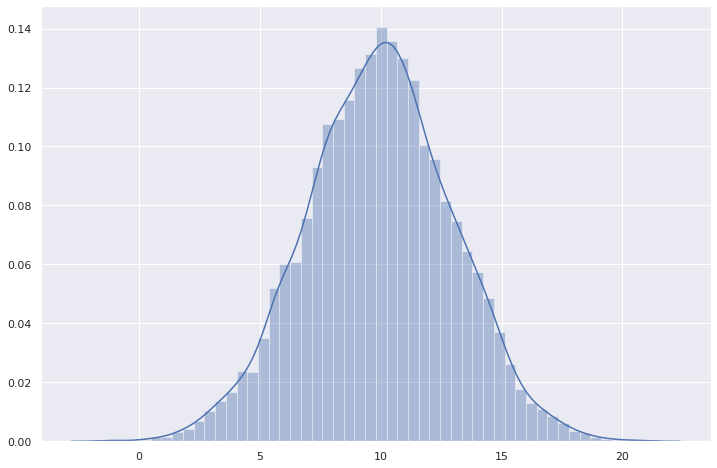

In [9]:
norm = sct.norm.rvs(loc=10, scale=3, size=10000) # loc é a média, scale é o desvio padrão. X ~ N(10, 9).

sns.distplot(norm);

Note que, apesar de termos criado a amostra a partir de uma distribuição com média exatamente zero e variância exatamente 9 (populacional), a amostra que geramos possui média amostral e variância amostral ligeiramente diferente de 0 e 9:

In [10]:
(norm.mean(), norm.var())

(9.952629019438628, 9.084484950697867)

Podemos encontrar $P(X \leq 8)$ com a função `cdf()`:

In [14]:
sct.norm.cdf(8, loc=10, scale=3)

0.2524925375469229

Obviamente, como a distribuição é normal é simétrica em torno da média $\mu$, a probabilidade de $X$ assumir um valor menor ou igual à média deve ser 0.5 (50%), ou seja, $P(X \leq \mu) = 0.5$:

In [15]:
sct.norm.cdf(10, loc=10, scale=3)

0.5

Podemos utilizar a função `cdf()` em conjunto com a função `linspace()` do NumPy para gerar um gráfico da CDF:

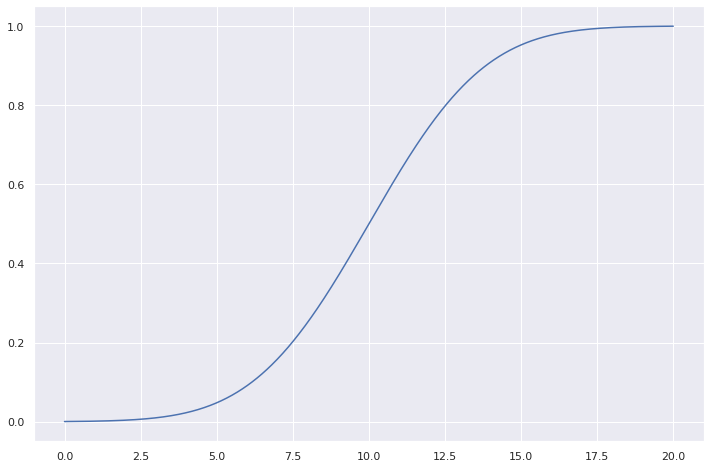

In [16]:
x = np.linspace(0, 20, num=1000)

f = lambda x: sct.norm.cdf(x, loc=10, scale=3)

cdf = f(x)

sns.lineplot(x, cdf);

Às vezes, estamos interessados no complemento da CDF, ou seja, na probabilidade a partir da outra ponta da distribuição. Para isso, usamos a função `sf()`. Por exemplo, utilizamos essa função para achar $P(X \geq 8)$:

In [17]:
sct.norm.sf(8, loc=10, scale=3)

0.7475074624530771

Note como esse valor é o complemento da probabilidade encontrado acima com a CDF.

Também pode ser útil encontrar o quantil para determinada probabilidade (acumulada a partir da cauda à esquerda). Por exemplo, podemos nos perguntar qual o valor de $X$ que acumula 25% da probabilidade, ou seja, qual valor de $x$ tal que $P(X \leq x) = 0.25$? Respondemos esse tipo de pergunta com a função `ppf()`:

In [18]:
sct.norm.ppf(0.25, loc=10, scale=3)

7.976530749411754

Se quiséssemos o saber o quantil para a probabilidade acumulada a partir da cauda à direita, usaríamos a função `isf()`. Por exemplo, se quisermos encontrar $x$ tal que $P(X \geq x) = 0.25$:

In [19]:
sct.norm.isf(0.25, loc=10, scale=3)

12.023469250588246

Por fim, podemos querer saber o valor da função densidade de probabilidade, $f(x)$, em determinado ponto. Apesar de não ser tão útil normalmente (por __não__ ser representar uma probabilidade), ela pode ter seus usos. Para isso, utilizamos a função `pdf()`. Para acharmos $f(8)$:

In [ ]:
sct.norm.pdf(8, loc=10, scale=3)

0.10648266850745075

Na distribuição normal, a função $f(x)$ assume seu valor máximo na média:

In [ ]:
sct.norm.pdf(10, loc=10, scale=3)

0.1329807601338109

Como fizemos com a CDF, podemos utilizar a função `linspace()` para gerar o gráfico da pdf:

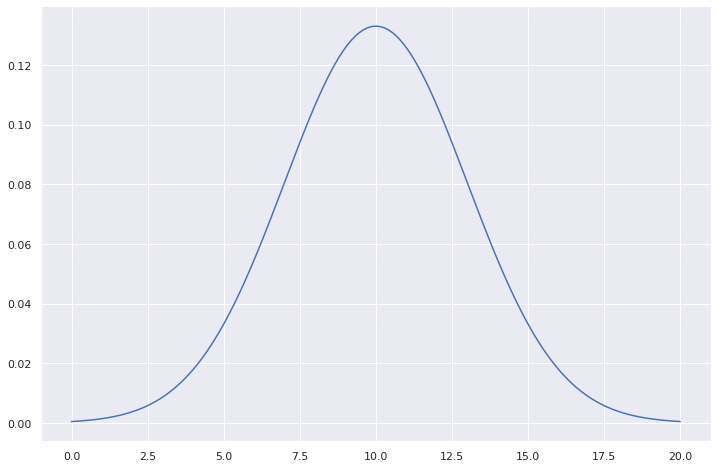

In [20]:
x = np.linspace(0, 20, num=1000)

f = lambda x: sct.norm.pdf(x, loc=10, scale=3)

pdf = f(x)

sns.lineplot(x, pdf);

Agora que estamos mais familiarizados com a distribuição normal, veremos a distribuição binomial.

## Distribuição binomial

Agora focaremos em uma distribuição discreta: a distribuição binomial. A distribuição binomial tem grande relação com a distribuição de Bernoulli, então a apresentaremos brevemente antes.

A distribuição de Bernoulli é uma das mais simples distribuições discretas com apenas um parâmetro, $p$. Ela nos informa sobre a distribuição de uma V.A que toma valor 1 com probabilidade $p$ e valor 0 com probabilidade $q = 1-p$. Portanto, sua função de massa de probabilidade pode ser escrita como:

$$f(x) = p^{x} (1-p)^{1-x}$$

para $x \in \{0, 1\}$. Se $X$ tem distribuição de Bernoulli, denotamos por $X \sim \text{Bernoulli}(p)$.

Note que,se $p = 0.5$, temos basicamente a distribuição do lançar de uma única moeda não viciada.

A distribuição binomial, por sua vez, nos diz sobre a distribuição de uma V.A que é a quantidade de resultados 1 (sucessos) de uma sequência de $n$ lançamentos __independentes__ de uma moeda que tem probabilidade $p$ de sair 1 (por exemplo, cara) e probabilidade $q = 1 - p$ de sair 0 (por exemplo, coroa). Note que cada um dos $n$ lançamentos pode ser modelado individualmente por uma distribuição de Bernoulli.

Essa distribuição tem dois parâmetros: $n \in \mathbb{N}$ é a quantidade de lançamentos e $p \in [0, 1]$ é a probabilidade de $X$ assumir 1 (ou ter um sucesso). Se X tem distribuição binomial de parâmetros $n$ e $p$, denotamos por $X \sim \text{Bin}(n, p)$.

A função massa de probabilidade da distribuição binomial é dada por:

$$f(k) = P(X = k) = C(n, k) p^{k} (1 - p)^{n - k}$$

onde $k$ é a quantidade de sucessos nos $n$ experimentos. Obviamente $k \in \{0, 1, 2, \dots, n\}$.

Note que $P(X = k)$ não é mais necessariamente igual a zero, como era com a distribuição normal. A diferença agora é que a binomial é __discreta__, enquanto a normal é __contínua__.

Definimos também a função de distribuição acumulada (CDF), $F(k)$ como

$$F(k) = P(X \leq k) = P(X = 0) + P(X = 1) + \dots + P(X = k) = \sum_{i=0}^{k} C(n, i) p^{i} (1 - p)^{n - i}$$

O valor esperado de $X \sim \text{Bin}(n, p)$ é

$$\mathbb{E}[X] = np$$

e sua variância é

$$\text{Var}[X] = np(1 - p) = npq$$

onde $q = 1 - p$.

Vamos explorar a distribuição binomial visualmente um pouco. No experimento abaixo

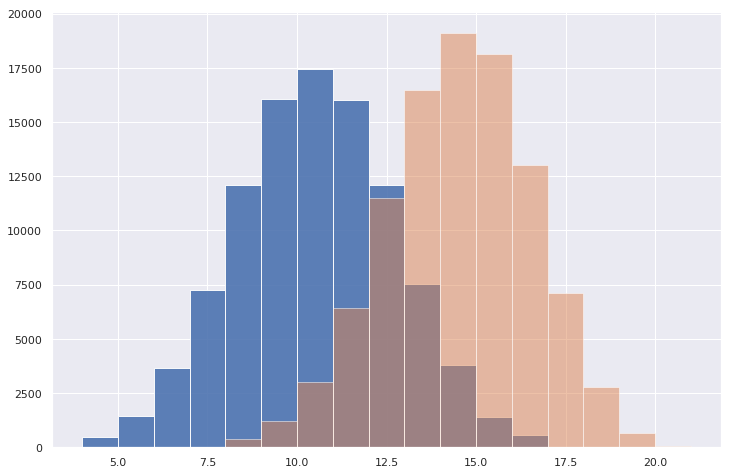

In [ ]:
binom_20_05 = sct.binom.rvs(20, 0.5, size=100000) # Média 10, variância 5.
binom_20_07 = sct.binom.rvs(20, 0.7, size=100000) # Média 14, variância 4.2.

sns.distplot(binom_20_05, bins=range(4, 18), kde=False, hist_kws={"alpha": 0.9});
sns.distplot(binom_20_07, bins=range(8, 22), kde=False, hist_kws={"alpha": 0.5});

A maior parte das funções disponíveis para a distribuição normal que apresentamos também está disponível para a distribuição binomial:

* `mean()`: $\mathbb{E}[X]$
* `var()`: $\text{Var}[X]$
* `rvs()`: $\vec{X}$
* `cdf()`: $P(X \leq x)$
* `sf()`: $P(X > x)$
* `ppf()`: $x$ tal que $P(X \leq x) = p$
* `isf()`: $x$ tal que $P(X > x) = p$

A única mudança significativa é na função `pmf()` ($P(X = x)$), que na normal era chamada `pdf()` ($f(x)$).

Vejamos alguns exemplos para reforçar.

__Exemplo 2__: Qual a probabilidade de obtermos no máximo 3 caras (sucessos) em 20 lançamentos de uma moeda viciada, que tem probabilidade $0.10$ de sair cara?

Resposta:

O que buscamos é

$$P(X \leq 3) = \sum_{i=0}^{3} C(20, i) (0.10)^{i} (0.9)^{20 - i}$$

Uma das formas de resolver isso com SciPy é somar a $f(i)$ para $i \in \{0, 1, 2, 3\}$, usando a função `pmf()`:

In [ ]:
sum((sct.binom.pmf(i, 20, 0.10) for i in range(4))) # Realiza exatamente o somatório mostrado acima.

0.8670466765656644

Outra forma é utilizar direto a CDF através da função `cdf()`:

In [ ]:
sct.binom.cdf(3, 20, 0.10)

0.867046676565665

__Exemplo 3__: Qual a probabilidade de obtermos pelo menos 10 sucessos em 20 lançamentos da mesma moeda viciada acima?

Resposta:

O que queremos agora é

$$P(X \geq 10) = P(X > 9) = 1 - P(X < 10) = 1 - P(X \leq 9) = 1 - \sum_{i=0}^{9} C(20,i) (0.10)^{i} (0.9)^{20 - i}$$

De novo, podemos utilizar a função `pmf()`:

In [ ]:
1 - sum((sct.binom.pmf(i, 20, 0.10) for i in range(10))) # Realiza exatamente o somatório mostrado acima.

7.150904021813176e-06

Ou usar a função `cdf()`:

In [ ]:
1 - sct.binom.cdf(9, 20, 0.10)

7.15090402103602e-06

Ou utilizarmos a função `sf()`, que nos dá a probabilidade a partir da cauda à direita, e elimina a necessidade de subtrair o resultado de 1:

In [ ]:
sct.binom.sf(9, 20, 0.10)

7.150904021083785e-06

Note que a função `sf(k)` calcula $P(X > k)$ e __não__ $P(X \geq k)$.

Agora vamos falar da relação entre a distribuição binomial e a normal.

Você deve concordar que fazer o cálculo da CDF da binomial através de somatórios não é a coisa mais divertida, nem computacionalmente mais eficiente. **Acontece que a binomial pode ser aproximada pela normal, se estivermos falando de valores grandes de** $n$. É de acordo que $n \geq 20$ deve servir, e de preferência que $p$ não esteja nem muito próximo de 0 nem de 1.

Nesse cenário, podemos utilizar a distribuição normal como uma boa aproximação para a distribuição binomial, o que significa que todas as funções que mostramos para a função normal podem ser utilizadas para resolver problemas envolvendo a distribuição binomial.

A relação mais especificamente é a seguinte, se $X \sim \text{Bin}(n, p)$, então podemos aproximar resultados sobre $X$ utilizando a seguinte distribuição normal:

$$N(np, np(1 - p))$$

Note como $\mu = np$ e $\sigma^{2} = np(1 - p)$ são exatamente iguais à média e variância da distribuição binomial, respectivamente.

Vejamos alguns exemplos.

__Exemplo 4__: Qual a probabilidade de obtermos pelo menos 50 sucessos em 200 lançamentos de uma moeda viciada que tem probabilidade de sucesso igual a $0.3$?

Resposta:

Dispondo somente da distribuição binomial como fizemos até agora, deveríamos calcular:

$$P(X \geq 50) = 1 - P(X < 50) = 1 - P(X \leq 49) = 1 - \sum_{i=0}^{49} C(200,i) (0.3)^{i} (0.7)^{200 - i}$$

O que em um computador moderno não deve ser grandes problemas:

In [ ]:
1 - sct.binom.cdf(49, 200, 0.3) # X ~ Bin(200, 0.3).

0.9494082059701139

Porém, como $n = 200$ e $p = 0.3$ (nem tão perto de 0, nem de 1), então podemos utilizar a distribuição normal para aproximar esse valor:

In [ ]:
1 - sct.norm.cdf(50, 60, sqrt(42)) # Y ~ N(60, 42).

0.9385886759493037

Ou ainda, utilizar a normal padronizada $\left(Z = \frac{(Y-\mu)}{\sigma} \sim N(0, 1)\right)$:

In [ ]:
1 - sct.norm.cdf((50 - 60)/sqrt(42), 0, 1) # Z ~ N(0, 1).

0.9385886759493037

É recomendado introduzir também um fator de correção de continuidade nessa aproximação. Para isso, simplesmente calculamos $Y$ (a V.A normalmente distribuída) diminuída de 0.5, ou seja:

$$P(X \geq 50) \approx P(Y \geq 49.5)$$

In [ ]:
1 - sct.norm.cdf(49.5, 60, sqrt(42)) # Y ~ N(60, 42).

0.9474037474399793

Que é bem mais próximo do real valor encontrado utilizando a exata distribuição binomial mais acima.

Se quiséssemos $P(X \leq 50)$, então aproximaríamos como:

$$P(X \leq 50) \approx P(Y \leq 50.5)$$

ou seja, adicionando 0.5 à variável normalmente distribuída.

## Referências

* [Probability Theory Review for Machine Learning](https://see.stanford.edu/materials/aimlcs229/cs229-prob.pdf)

* [Understanding Probability Distributions](https://statisticsbyjim.com/basics/probability-distributions/)

* [Probability Distribution](https://en.wikipedia.org/wiki/Probability_distribution)

* [Statistical Modeling: The Two Cultures](http://www2.math.uu.se/~thulin/mm/breiman.pdf)

* [Variáveis Aleatórias Unidimensionais](http://www.professores.uff.br/anafarias/wp-content/uploads/sites/32/2017/08/GET00182-DistNomal.pdf)